In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib

## Task 1: Books Comparison on word count

### Book 1

In [85]:
target_url0 = 'https://www.gutenberg.org/cache/epub/996/pg996.txt'
book_raw = urlopen(target_url0).read().decode('utf-8')

In [86]:
type(book_raw)

str

In [87]:
len(book_raw)

2361835

In [88]:
book_raw[1:200]

'The Project Gutenberg eBook of Don Quixote\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhat'

In [89]:
word_token=word_tokenize(book_raw)

In [90]:
word_token.index('24K') # strting point

26401

In [91]:
word_token1=word_token[26401:]

In [92]:
print(f'No of words reduced by removing premble:{len(word_token)- len(word_token1)}')

No of words reduced by removing premble:26401


In [93]:
smallcaps1 = [w.lower() for w in word_token1 if not any(ch.isdigit() for ch in w)]

In [94]:
stp_word=stopwords.words('english')

In [95]:
flt_book = [w for w in smallcaps1 if not w in stp_word]

In [96]:
import string

# List of punctuation characters
punctuation_list = list(string.punctuation)
extra_punct = ["''", "``", "'"]
punctuation_list = punctuation_list + extra_punct
punctuation_list += ["“", "”", "’", "‘"]

In [97]:
flt_book = [w for w in flt_book if not w in punctuation_list]

In [98]:
print(f'No of words reduced by removing stop words:{len(word_token)- len(flt_book)}')

No of words reduced by removing stop words:318831


In [99]:
print(f'After removing stopwords, the word_count is {round((len(flt_book)/len(word_token))*100,2)} % of original dataset')

After removing stopwords, the word_count is 36.07 % of original dataset


### Book 2

In [100]:
target_url0 = 'https://www.gutenberg.org/files/1184/1184-0.txt'
book_raw2 = urlopen(target_url0).read().decode('utf-8')

In [101]:
word_token_book2=word_tokenize(book_raw2)

In [102]:
word_token_book2.index('October') # strting point

733

In [103]:
word_token_book2_cl=word_token_book2[734:]

In [104]:
print(f'No of words reduced by removing premble:{len(word_token_book2)- len(word_token_book2_cl)}')

No of words reduced by removing premble:734


In [105]:
smallcaps2 = [w.lower() for w in word_token_book2_cl if not any(ch.isdigit() for ch in w)]

In [106]:
stp_word=stopwords.words('english')

In [107]:
flt_book_book2 = [w for w in smallcaps2 if not w in stp_word]

In [108]:
flt_book_book2 = [w for w in flt_book_book2 if not w in punctuation_list]

In [109]:
print(f'No of words reduced by removing stop words:{len(word_token_book2)- len(flt_book_book2)}')

No of words reduced by removing stop words:349137


In [110]:
print(f'After removing stopwords, the word_count is {round((len(flt_book_book2)/len(word_token_book2))*100,2)} % of original dataset')

After removing stopwords, the word_count is 38.92 % of original dataset


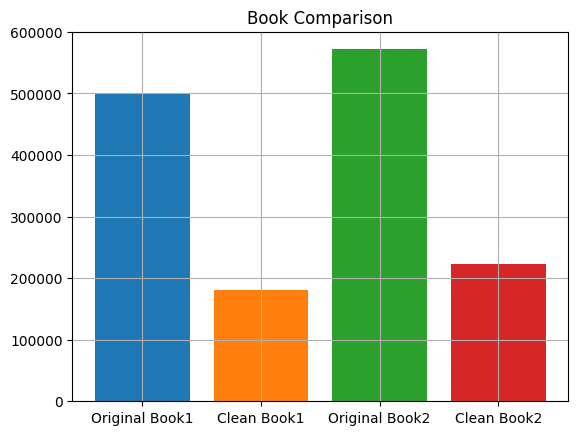

In [111]:
plt.title('Book Comparison')

plt.grid()
plt.bar(x='Original Book1',height=len(word_token))
plt.bar(x='Clean Book1',height=len(flt_book))

plt.bar(x='Original Book2',height=len(word_token_book2))
plt.bar(x='Clean Book2',height=len(flt_book_book2))
plt.show()

## Task 2

In [112]:
B1_sentences = sent_tokenize(book_raw)
B2_sentences = sent_tokenize(book_raw2)

In [113]:
def preprocess(text, stopwords):
    tokens = word_tokenize(text)

    # lowercase
    tokens = [w.lower() for w in tokens]

    # remove tokens containing digits
    tokens = [w for w in tokens if not any(ch.isdigit() for ch in w)]

    # remove stopwords
    tokens = [w for w in tokens if w not in stopwords]

    # remove punctuation tokens
    tokens = [w for w in tokens if w not in punctuation_list]

    return tokens

In [114]:
def avg_sentence_length_after_cleaning(book_raw, stopwords):
    sentences = sent_tokenize(book_raw)
    sentence_lengths = []

    for sent in sentences:
        cleaned = preprocess(sent, stopwords)
        sentence_lengths.append(len(cleaned))

    return sum(sentence_lengths) / len(sentence_lengths)

In [115]:
print("Book 1:", avg_sentence_length_after_cleaning(book_raw, stp_word))
print("Book 2:", avg_sentence_length_after_cleaning(book_raw2, stp_word))

Book 1: 29.659157992853814
Book 2: 14.589953500556684


In [116]:
book1_tokens = preprocess(book_raw, stp_word)
book2_tokens = preprocess(book_raw2, stp_word)

In [117]:
from nltk import FreqDist

fdist_book1 = FreqDist(book1_tokens)
fdist_book2 = FreqDist(book2_tokens)

freq_book1 = dict(fdist_book1) 
freq_book2 = dict(fdist_book2)

In [118]:
sorted_book1 = sorted(freq_book1.items(), key=lambda x: x[1], reverse=True)
sorted_book2 = sorted(freq_book2.items(), key=lambda x: x[1], reverse=True)
print('Book1')
print(sorted_book1[:20]) 
print('Book2')
print(sorted_book2[:20])

Book1
[('said', 2620), ('quixote', 2308), ('sancho', 2195), ('one', 1598), ('would', 1247), ('thou', 1228), ('say', 895), ('good', 851), ('may', 849), ('see', 768), ('thee', 735), ('without', 724), ('know', 705), ('made', 684), ('could', 679), ('upon', 671), ('great', 657), ('let', 649), ('time', 645), ('come', 643)]
Book2
[('said', 3480), ('count', 1458), ('one', 1442), ('man', 1370), ('would', 1205), ('monte', 1133), ('cristo', 1104), ('villefort', 1061), ('de', 1036), ('m.', 1018), ('well', 914), ('danglars', 884), ('know', 814), ('yes', 805), ('young', 791), ('two', 765), ('albert', 765), ('morrel', 764), ('madame', 756), ('replied', 738)]


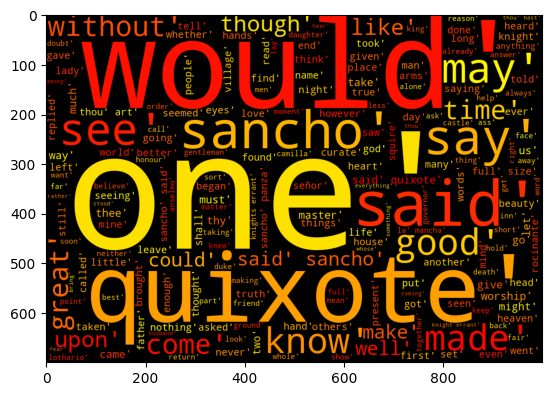

In [121]:
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='black', colormap=matplotlib.cm.autumn,
                min_font_size = 10).generate(str(flt_book))
plt.imshow(wordcloud)

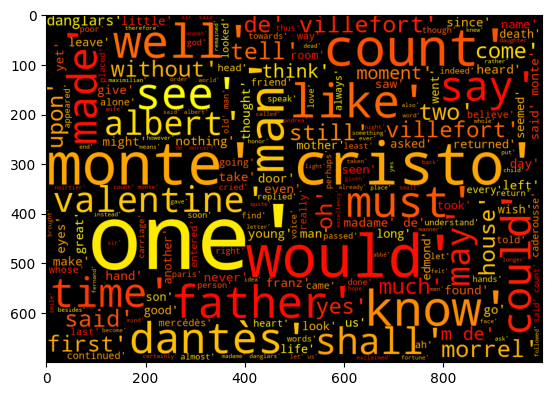

In [122]:
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='black', colormap=matplotlib.cm.autumn,
                min_font_size = 10).generate(str(flt_book_book2))
plt.imshow(wordcloud)

## Task 3

In [123]:
characters = [
    "quixote",
    "don quixote",
    "sancho",
    "sancho panza",
    "dulcinea",
    "rocinate",
    "rocinante"
]

In [133]:
def find_character_lines(text, character_list):
    lines = text.split("\n")
    results = {char: [] for char in character_list}

    for i, line in enumerate(lines):
        line_lower = line.lower()
        for char in character_list:
            if char in line_lower:          # substring match
                results[char].append(i)     # store line index only

    return results


In [134]:
character_locations = find_character_lines(book_raw, characters)

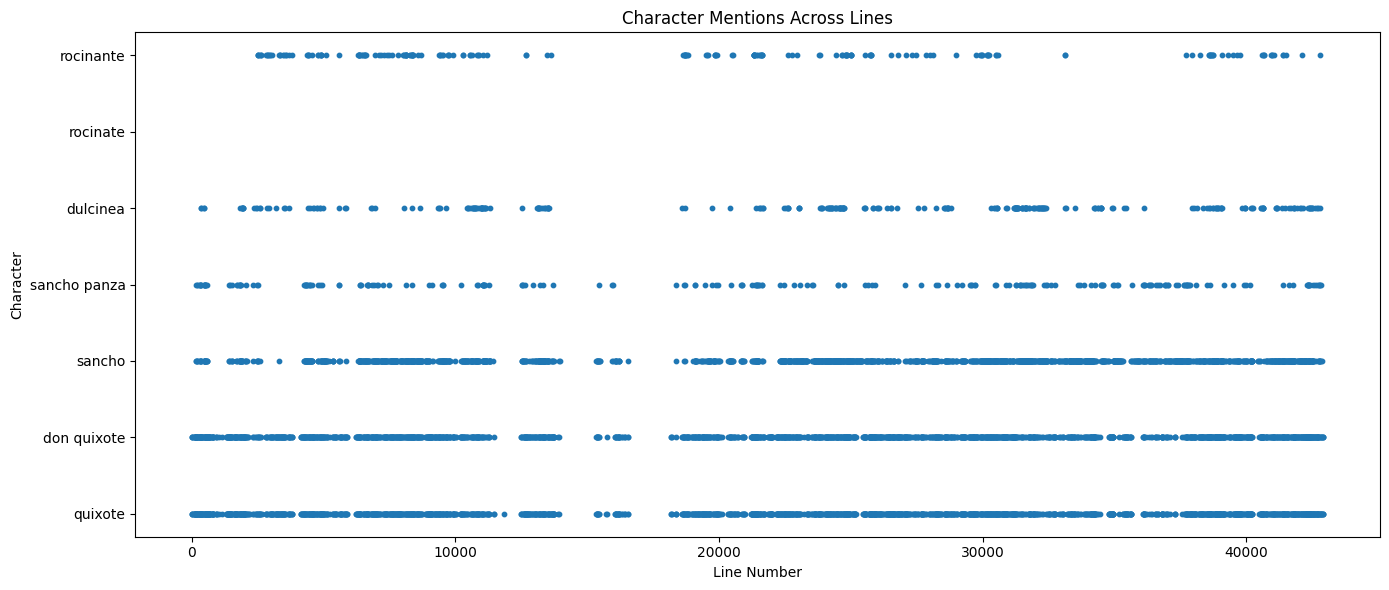

In [136]:
import matplotlib.pyplot as plt

# Build scatter plot data
x_vals = []   # line numbers
y_vals = []   # encoded character index

char_to_y = {char: i for i, char in enumerate(characters)}

for char, line_list in character_locations.items():
    for line_index in line_list:
        x_vals.append(line_index)
        y_vals.append(char_to_y[char])

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(x_vals, y_vals, s=10)  # s = point size

plt.xlabel("Line Number")
plt.ylabel("Character")
plt.title("Character Mentions Across Lines")

# Set Y-axis labels to character names
plt.yticks(list(char_to_y.values()), characters)

plt.tight_layout()
plt.show()


## Task 3

In [137]:
def find_character_token_positions(tokens, characters):
    positions = {char: [] for char in characters}
    
    for i, token in enumerate(tokens):
        tok = token.lower()
        for char in characters:
            if char in tok:       # substring match
                positions[char].append(i)
    return positions

In [138]:
def compute_interactions(token_positions, threshold=500):
    chars = list(token_positions.keys())
    n = len(chars)
    
    # Create matrix
    matrix = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            
            c1, c2 = chars[i], chars[j]
            pos1, pos2 = token_positions[c1], token_positions[c2]
            
            count = 0
            for p1 in pos1:
                for p2 in pos2:
                    if abs(p1 - p2) <= threshold:
                        count += 1
            
            matrix[i][j] = count
    
    return chars, matrix


In [139]:
import matplotlib.pyplot as plt
import numpy as np

def plot_interaction_heatmap(characters, matrix):
    plt.figure(figsize=(10, 8))
    matrix = np.array(matrix)
    
    plt.imshow(matrix, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Interaction Strength")
    
    plt.xticks(range(len(characters)), characters, rotation=45, ha="right")
    plt.yticks(range(len(characters)), characters)
    
    plt.title("Character Interaction Heatmap (Distance-Based)")
    plt.tight_layout()
    plt.show()


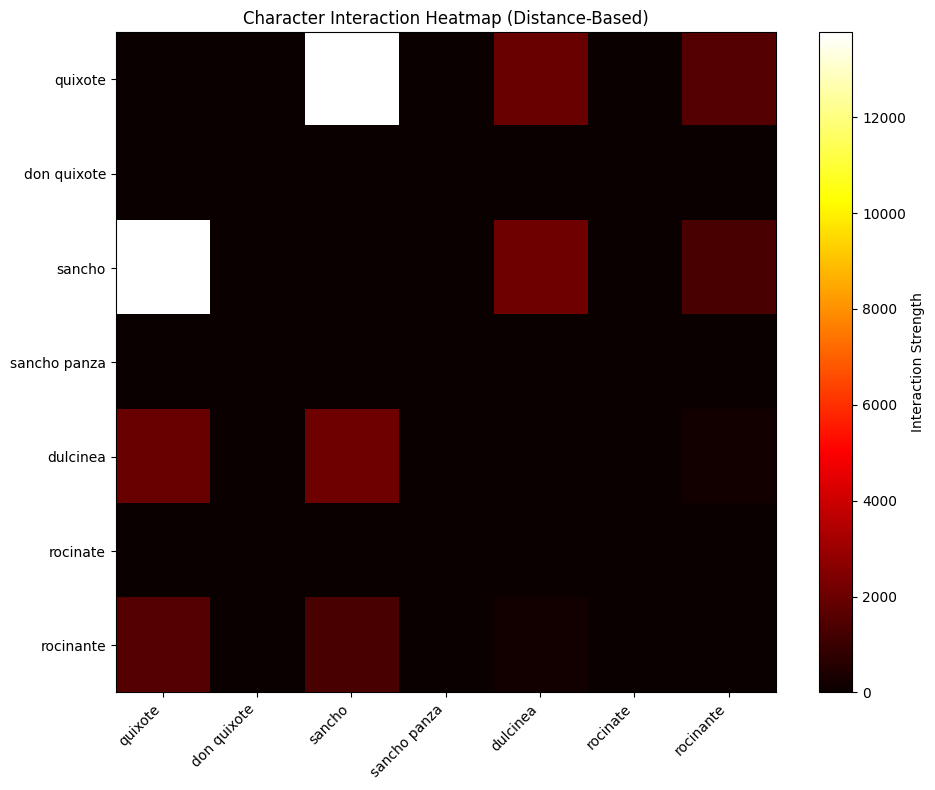

In [140]:
tokens = word_tokenize(book_raw.lower())   # or your existing token list

# 1. Find token positions
token_positions = find_character_token_positions(tokens, characters)

# 2. Compute interactions
chars, matrix = compute_interactions(token_positions, threshold=500)

# 3. Plot heatmap
plot_interaction_heatmap(chars, matrix)
